# Related to figure 3d heatmap

In [1]:
suppressMessages({library(RColorBrewer)
library(glue)
library(ggplot2)
library(msigdbr)
library(ggplot2)
library(glue)
library(dplyr)
library(Seurat)
library(pheatmap)})

In [2]:
obj_merged <- readRDS('/data/yuchen_data/Stereo_seq/All_Figures/Figure3/1.data/All_NaiveGCB.rds')

In [3]:
obj_merged <- subset(obj_merged, subset=TLS_maturity %in% c('Mature', 'NotMature'))
obj_merged$TLS_maturity[obj_merged$TLS_maturity=='NotMature'] = 'Deviating'

obj_merged$Group <- paste0(obj_merged$TLS_maturity, '_', obj_merged$CellSubType)
obj_merged$Group <- factor(obj_merged$Group, levels=c('Mature_GCB', 'Mature_Bnaive', 'Deviating_GCB', 'Deviating_Bnaive'))

obj_merged <- SetIdent(obj_merged, value=obj_merged$Group)

In [4]:
library(msigdbr)
all_gene_sets <- msigdbr(species = "Homo sapiens")
all_gene_sets <- as.data.frame(all_gene_sets)

gl <- list()
gl[['KEGG_TRYPTOPHAN_METABOLISM']] = all_gene_sets$gene_symbol[all_gene_sets$gs_name == 'KEGG_TRYPTOPHAN_METABOLISM']

obj_merged <- AddModuleScore(obj_merged, gl)

Warning message:
“The following features are not present in the object: WARS1, not searching for symbol synonyms”


In [5]:
df_expr = AverageExpression(obj_merged, features=gl[['KEGG_TRYPTOPHAN_METABOLISM']], assays='Spatial', slot='data')
df_plot = t(df_expr$Spatial)
df_plot = scale(df_plot)

Warning message:
“The following 1 features were not found in the Spatial assay: WARS1”


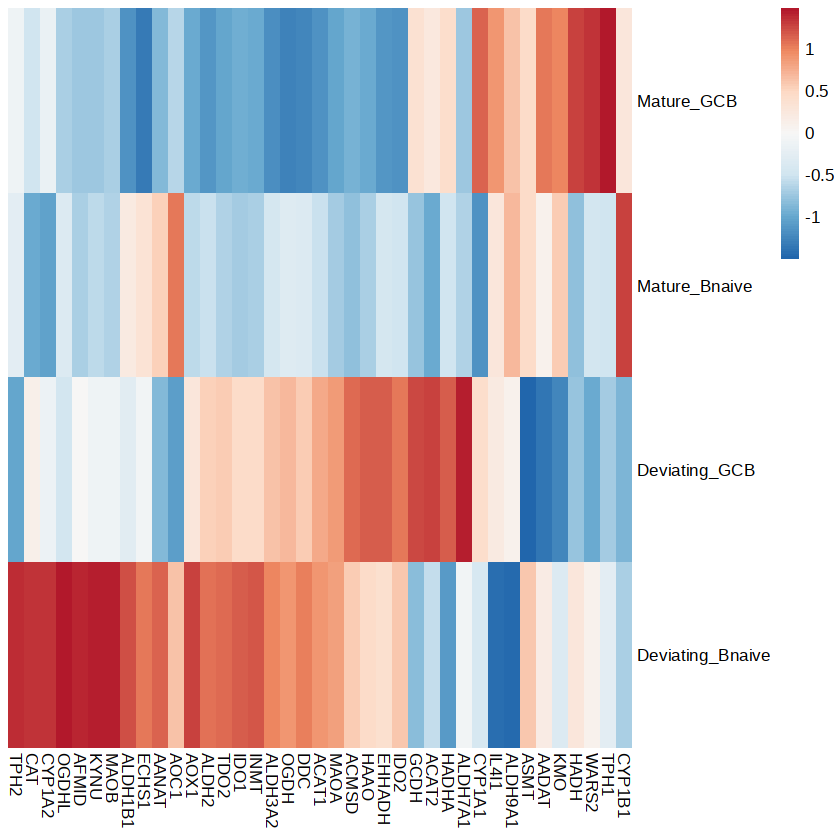

In [6]:
# heatmap
gene_order = c("TPH2", "CAT", "CYP1A2", "OGDHL", "AFMID", "KYNU", "MAOB", "ALDH1B1", "ECHS1", "AANAT", "AOC1", "AOX1", "ALDH2", "TDO2", "IDO1", "INMT", "ALDH3A2","OGDH", "DDC",  "ACAT1", "MAOA", "ACMSD", "HAAO", "EHHADH", "IDO2", "GCDH", "ACAT2", "HADHA", "ALDH7A1","CYP1A1", "IL4I1", "ALDH9A1", "ASMT", "AADAT", "KMO", "HADH", "WARS2", "TPH1", "CYP1B1")
df_plot = data.frame(df_plot)[, gene_order]

pheatmap(df_plot, cluster_cols=F, cluster_rows=F, scale = "none", treeheight_col=0, border_color=NA, color = colorRampPalette(rev(brewer.pal(n = 7, name ="RdBu")))(100))

In [7]:
df_plot = obj_merged@meta.data[, c('Cluster1', 'Group')]
df_plot$plot_color = as.character(lapply(as.character(df_plot$Group), function(x) {strsplit(x, '_')[[1]][1]}))
df_plot$plot_color = factor(df_plot$plot_color, levels=c('Mature', 'Deviating'))
df_plot$Cluster1 = (df_plot$Cluster1 - min(df_plot$Cluster1)) / (max(df_plot$Cluster1) - min(df_plot$Cluster1))
head(df_plot)

,Cluster1,Group,plot_color
,<dbl>,<fct>,<fct>
ST2740P_BIN.53270,0.5216032,Mature_Bnaive,Mature
ST2740P_BIN.53276,0.6162658,Mature_Bnaive,Mature
ST2740P_BIN.53799,0.3695791,Mature_Bnaive,Mature
ST2740P_BIN.53800,0.4052934,Mature_Bnaive,Mature
ST2740P_BIN.53803,0.4148322,Mature_Bnaive,Mature
ST2740P_BIN.53805,0.2949532,Mature_Bnaive,Mature


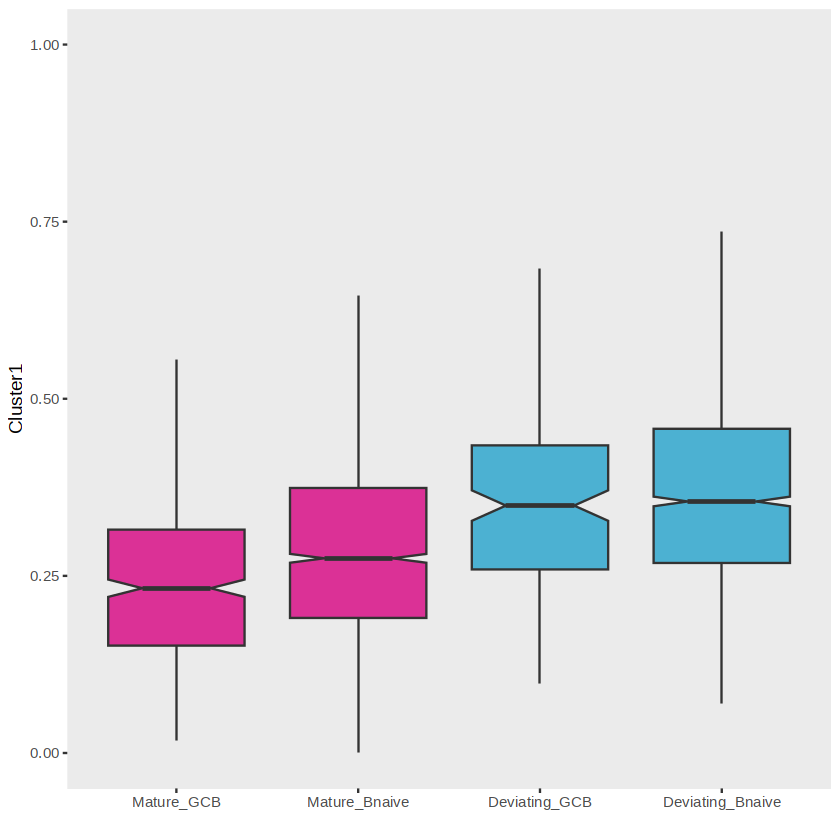

In [8]:
df_plot %>%
  ggplot( aes(x=Group, y=Cluster1, fill=plot_color)) +
    geom_boxplot(notch=T, outlier.shape = NA) +
    theme(
      legend.position="none",
      plot.title = element_text(size=11), 
      panel.grid=element_blank()
    ) + 
    scale_fill_manual(values=c("#db3196", "#4cb1d2")) + 
    xlab("")

In [9]:
write.table(obj_merged@meta.data, '/data/yuchen_data/Stereo_seq/All_Figures/Figure3/1.data/Naive_GCB_Tryptophan.txt', sep='\t', quote=F)